In [22]:
print('Devansh Hukmani')

Devansh Hukmani


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [156]:
nyp = pd.read_csv("/Users/devanshhukmani/Desktop/Assignments/ALY 6110/NYPD.csv")

In [157]:
nyp

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,261249590,01/02/2023,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,6,...,982745,206647,40.733876,-74.005428,POINT (-74.005428 40.733876),57.0,4.0,10.0,3.0,12077.0
1,261271301,01/03/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,...,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996),4.0,1.0,13.0,74.0,10369.0
2,262235280,01/20/2023,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,62,...,983289,158770,40.602464,-74.003460,POINT (-74.00346 40.602464),1.0,2.0,44.0,37.0,17616.0
3,264404265,03/01/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,120,...,958743,173302,40.642316,-74.091908,POINT (-74.091908 40.642316),4.0,1.0,13.0,74.0,10369.0
4,264443630,03/02/2023,808.0,TAX LAW,125.0,OTHER STATE LAWS (NON PENAL LA,TAX181400A,F,K,83,...,1006097,195371,40.702901,-73.921203,POINT (-73.921203 40.702901),42.0,2.0,37.0,53.0,13828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112566,267861068,05/07/2023,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,Q,113,...,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666),41.0,3.0,6.0,71.0,24669.0
112567,270481110,06/27/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,79,...,999872,187803,40.682141,-73.943673,POINT (-73.943673 40.682141),69.0,2.0,49.0,51.0,17618.0
112568,267833542,05/06/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601502,F,B,43,...,1019852,241853,40.830435,-73.871349,POINT (-73.871349 40.830435),58.0,5.0,31.0,26.0,11610.0
112569,268911088,05/27/2023,494.0,"STOLEN PROPERTY 2,1,POSSESSION",111.0,POSSESSION OF STOLEN PROPERTY,PL 1654502,F,B,46,...,1011750,250274,40.853578,-73.900591,POINT (-73.900591 40.853578),6.0,5.0,22.0,29.0,10935.0


In [158]:
nyp.shape

(112571, 24)

In [159]:
nyp.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
Community Districts         float64
Borough Boundaries          float64
City Council Districts      float64
Police Precincts            float64
Zip Codes                   float64
dtype: object

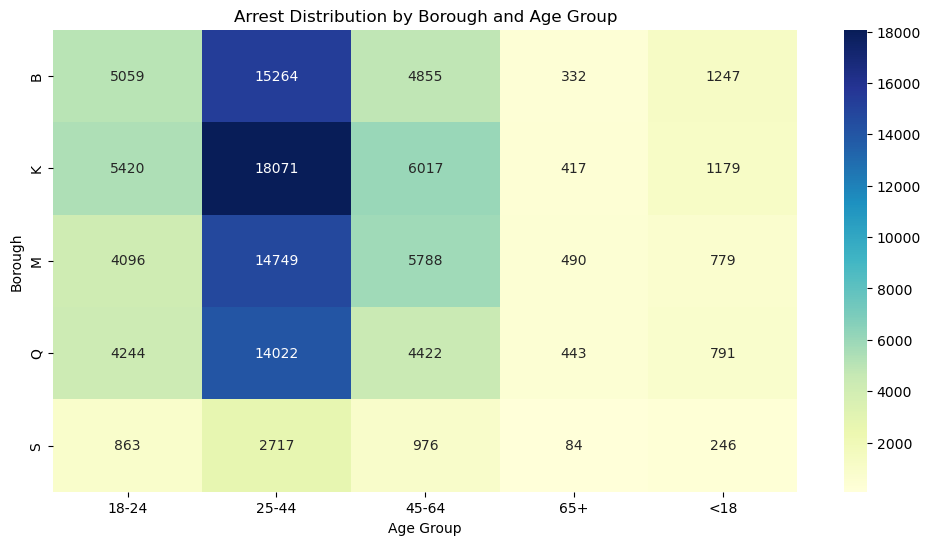

In [160]:
# Group data by "ARREST_BORO" and "AGE_GROUP" and calculate counts
arrests_by_borough_age = nyp.groupby(['ARREST_BORO', 'AGE_GROUP']).size().unstack()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.heatmap(arrests_by_borough_age, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Arrest Distribution by Borough and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Borough")
plt.show()

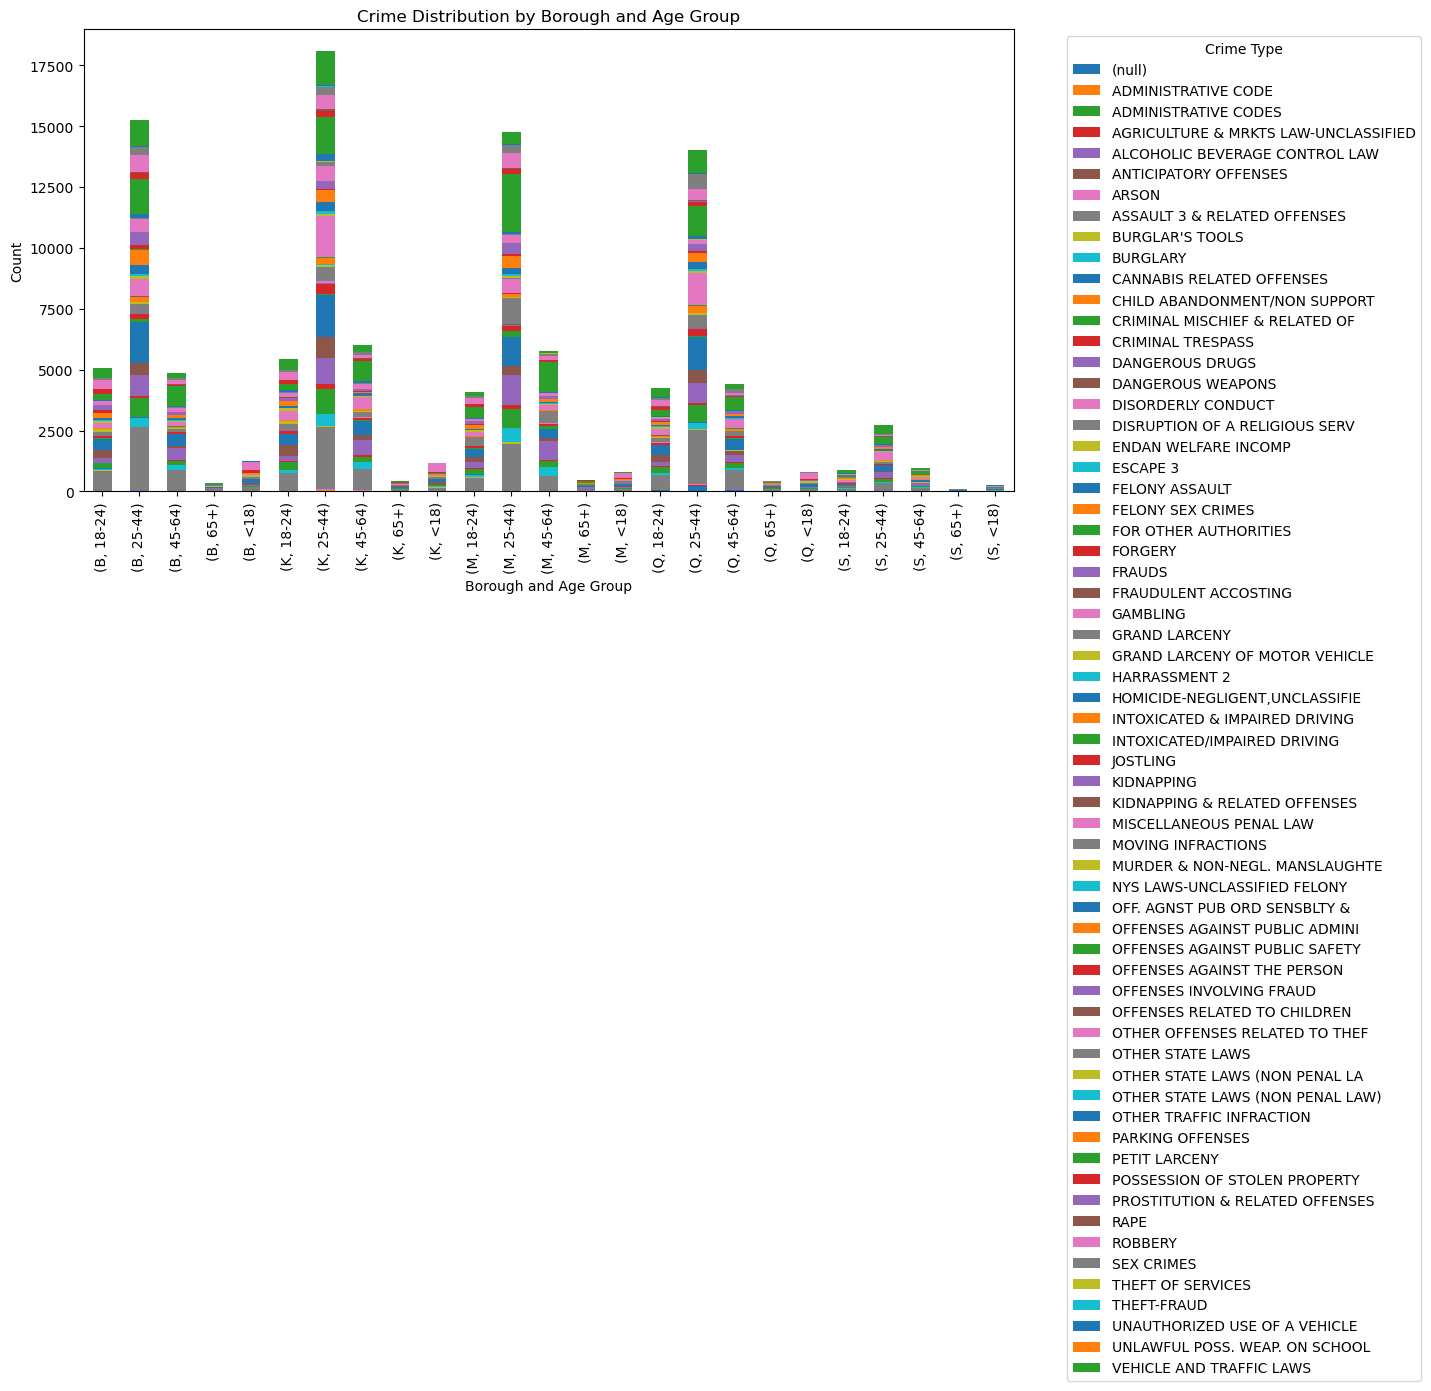

In [161]:
crime_by_borough_age = nyp.groupby(['ARREST_BORO', 'AGE_GROUP', 'OFNS_DESC']).size().unstack()
crime_by_borough_age.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Crime Distribution by Borough and Age Group")
plt.xlabel("Borough and Age Group")
plt.ylabel("Count")
plt.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


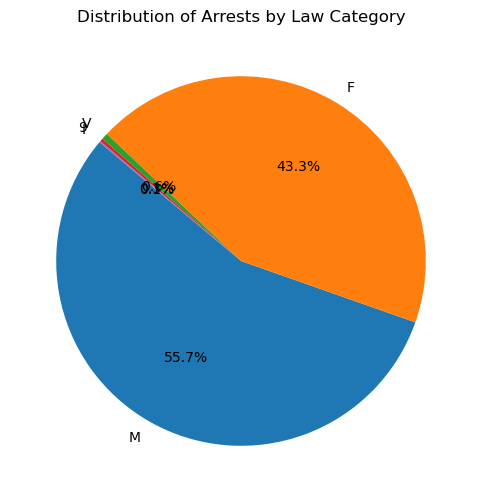

In [162]:
arrests_by_law_category = nyp['LAW_CAT_CD'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(arrests_by_law_category, labels=arrests_by_law_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Arrests by Law Category")
plt.show()

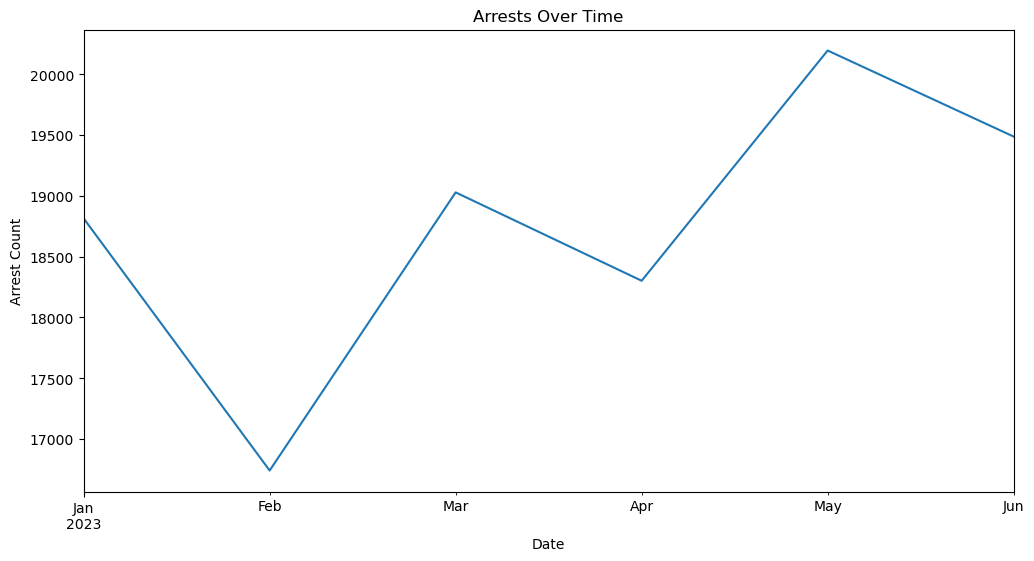

In [163]:
nyp['ARREST_DATE'] = pd.to_datetime(nyp['ARREST_DATE'])
arrests_over_time = nyp.resample('M', on='ARREST_DATE').size()
arrests_over_time.plot(figsize=(12, 6))
plt.title("Arrests Over Time")
plt.xlabel("Date")
plt.ylabel("Arrest Count")
plt.show()

In [164]:
nyp.corr()

/var/folders/dh/482615_56b55t20zpbjvyv8h0000gn/T/ipykernel_60859/3015963147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nyp.corr()


,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
ARREST_KEY,1.000000,-0.015945,-0.007518,-0.000967,-0.000881,0.004598,0.000363,0.000383,0.001311,-0.009767,0.002010,-0.000523,-0.001624,0.006336
PD_CD,-0.015945,1.000000,0.086178,0.073875,0.011762,0.023407,-0.060286,-0.034443,0.008677,-0.017409,-0.068773,-0.010973,0.073587,0.054512
KY_CD,-0.007518,0.086178,1.000000,-0.025181,-0.014817,-0.017982,0.011495,0.006665,-0.006262,0.003580,0.022496,-0.004120,-0.024718,-0.026970
ARREST_PRECINCT,-0.000967,0.073875,-0.025181,1.000000,-0.037170,0.271829,-0.486251,-0.267559,0.085258,0.118041,-0.637177,-0.211973,0.997560,0.565185
JURISDICTION_CODE,-0.000881,0.011762,-0.014817,-0.037170,1.000000,0.001414,0.023640,0.012585,0.001242,-0.004553,0.040985,0.029820,-0.037834,-0.011885
X_COORD_CD,0.004598,0.023407,-0.017982,0.271829,0.001414,1.000000,0.276185,0.267557,0.196161,0.310226,0.288228,0.002315,0.263235,0.469000
Y_COORD_CD,0.000363,-0.060286,0.011495,-0.486251,0.023640,0.276185,1.000000,0.575892,0.071896,0.008192,0.891770,0.086455,-0.470043,-0.494873
Latitude,0.000383,-0.034443,0.006665,-0.267559,0.012585,0.267557,0.575892,1.000000,-0.731708,0.008064,0.891736,0.086597,-0.470440,-0.495240
Longitude,0.001311,0.008677,-0.006262,0.085258,0.001242,0.196161,0.071896,-0.731708,1.000000,0.310016,0.289171,0.002052,0.262996,0.468084
Community Districts,-0.009767,-0.017409,0.003580,0.118041,-0.004553,0.310226,0.008192,0.008064,0.310016,1.000000,0.034838,0.205569,0.119836,0.223384


/var/folders/dh/482615_56b55t20zpbjvyv8h0000gn/T/ipykernel_60859/3213357146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nyp.corr(), annot = True)


Text(0.5, 1.0, 'Corelation chart')

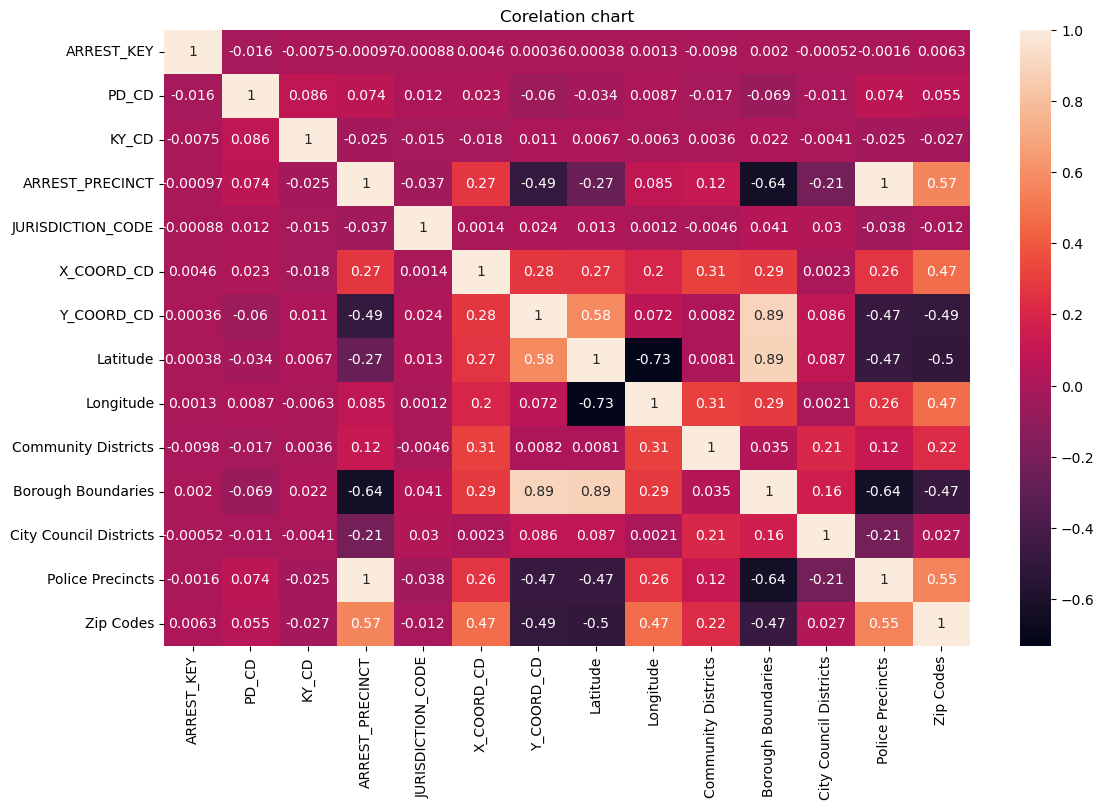

In [165]:
plt.figure(figsize = (13,8))
sns.heatmap(nyp.corr(), annot = True)
plt.title('Corelation chart')

In [166]:
#missing values
nyp.isna().sum()

ARREST_KEY                    0
ARREST_DATE                   0
PD_CD                       461
PD_DESC                       0
KY_CD                       466
OFNS_DESC                     0
LAW_CODE                      0
LAW_CAT_CD                  846
ARREST_BORO                   0
ARREST_PRECINCT               0
JURISDICTION_CODE             0
AGE_GROUP                     0
PERP_SEX                      0
PERP_RACE                     0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      0
Longitude                     0
New Georeferenced Column      0
Community Districts          13
Borough Boundaries           16
City Council Districts       13
Police Precincts             13
Zip Codes                   237
dtype: int64

In [167]:
# drop missing values from this column as cant use mean, median or mode for a Three digit internal classification code
nyp.dropna(subset=['PD_CD'], inplace=True)
nyp.dropna(subset=['KY_CD'], inplace=True)

In [168]:
#na to mode 
# Calculate the mode of the "LAW_CAT_CD" column
mode_value = nyp['LAW_CAT_CD'].mode()[0]

# Replace missing values with the mode
nyp['LAW_CAT_CD'].fillna(mode_value, inplace=True)


In [169]:
nyp.dropna(subset=['Community Districts'], inplace=True)
nyp.dropna(subset=['Borough Boundaries'], inplace=True)
nyp.dropna(subset=['City Council Districts'], inplace=True)
nyp.dropna(subset=['Police Precincts'], inplace=True)
#dropped values from these columns as missing values are negligible

In [170]:
#na to mode 
# Calculate the mode of the "Zip Codes" column
mode_value = nyp['Zip Codes'].mode()[0]

# Replace missing values with the mode
nyp['Zip Codes'].fillna(mode_value, inplace=True)


In [171]:
#missing values
nyp.isna().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
Community Districts         0
Borough Boundaries          0
City Council Districts      0
Police Precincts            0
Zip Codes                   0
dtype: int64

In [172]:
#Checking for Data Duplication
nyp.duplicated().sum()

0

In [173]:
# Find columns with '?' values
columns_with_missing_values = nyp.columns[nyp.isin(['?']).any()]

# Print the columns with '?' values
print("Columns with '?' values:")
for column in columns_with_missing_values:
    print(column)


Columns with '?' values:


In [174]:
#check for whitespace-only values in string columns
whitespace_data = nyp.select_dtypes(include=['object']).apply(lambda x: x.str.isspace()).any()
if whitespace_data.any():
    print("Whitespace-only values are present in the dataset.")
else:
    print("No whitespace-only values found.")

No whitespace-only values found.


In [175]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select the target variable 'LAW_CAT_CD' and relevant features
target_column = 'LAW_CAT_CD'
features = ['ARREST_BORO', 'AGE_GROUP', ]

# Filter the DataFrame to include only the selected columns
nyp = nyp[[target_column] + features]

# Encode categorical features
label_encoders = {}
for column in features:
    if nyp[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        nyp[column] = label_encoders[column].fit_transform(nyp[column])

# Split the dataset into training and testing sets
X = nyp[features]
y = nyp[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can help with model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # You may need to adjust the max_iter based on your dataset
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


/var/folders/dh/482615_56b55t20zpbjvyv8h0000gn/T/ipykernel_60859/1434822674.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyp[column] = label_encoders[column].fit_transform(nyp[column])
/var/folders/dh/482615_56b55t20zpbjvyv8h0000gn/T/ipykernel_60859/1434822674.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyp[column] = label_encoders[column].fit_transform(nyp[column])
/Users/devanshhukmani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: 

Accuracy: 0.5777500223035061
Confusion Matrix:
[[  422     0  9146     0]
 [    0     0    27     0]
 [  170     0 12530     0]
 [    1     0   122     0]]
Classification Report:
              precision    recall  f1-score   support

           F       0.71      0.04      0.08      9568
           I       0.00      0.00      0.00        27
           M       0.57      0.99      0.73     12700
           V       0.00      0.00      0.00       123

    accuracy                           0.58     22418
   macro avg       0.32      0.26      0.20     22418
weighted avg       0.63      0.58      0.45     22418



/Users/devanshhukmani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'nyp' is your dataset

# Select relevant columns for the analysis
features = ['ARREST_BORO', 'AGE_GROUP']
target = 'LAW_CAT_CD'

# Split the data into training and testing sets
X = nyp[features]
y = nyp[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


Accuracy: 0.5837273619412972
Confusion Matrix:
[[  623     0  8945     0]
 [    0     0    27     0]
 [  237     0 12463     0]
 [    1     0   122     0]]
Classification Report:
              precision    recall  f1-score   support

           F       0.72      0.07      0.12      9568
           I       0.00      0.00      0.00        27
           M       0.58      0.98      0.73     12700
           V       0.00      0.00      0.00       123

    accuracy                           0.58     22418
   macro avg       0.33      0.26      0.21     22418
weighted avg       0.64      0.58      0.46     22418



/Users/devanshhukmani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/devanshhukmani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/devanshhukmani/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
